### IESB
___
### Pós Graduação em Inteligência Artificial
#### Disciplina: Aprendizado não Supervisionado
#### Docente: Mateus Mendelson
#### Discente: Henrique Brandão

#### Atividades com dados `base-covid-19-us.csv`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
df = pd.read_csv('base-covid-19-us.csv')
df.shape

(1570, 3)

In [3]:
df.head()

,county,cases,deaths
0,Abbeville,84,0
1,Acadia,741,21
2,Accomack,116,0
3,Ada,4264,41
4,Adair,325,8


In [4]:
df.describe()

,cases,deaths
count,1570.000000,1570.000000
mean,2633.903822,69.952229
std,24352.089822,842.722792
min,1.000000,0.000000
25%,34.000000,0.000000
50%,133.500000,0.000000
75%,632.750000,17.000000
max,868824.000000,31887.000000


In [5]:
pontos = df[['cases', 'deaths']].values

<IPython.core.display.Javascript object>


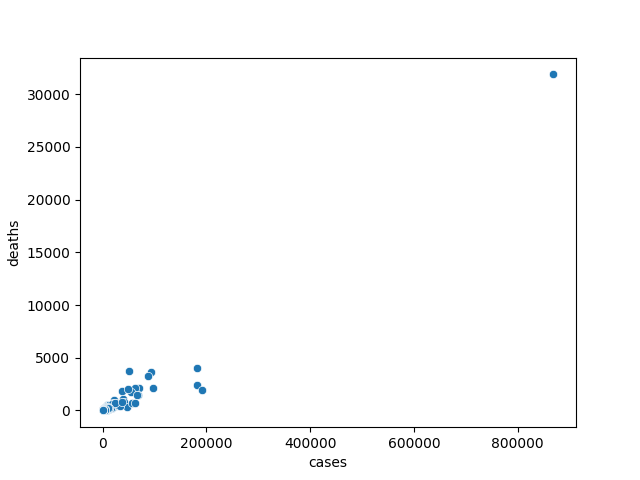

In [6]:
sns.scatterplot(x=df['cases'], y=df['deaths'])
plt.show()

In [8]:
from math import sqrt
from random import choice

In [9]:
def sortear_centroide_inicial(pontos):
    """Sorteia um dos pontos da amostra para ser um centroide inicial"""
    return choice(pontos)

In [10]:
def distancia(u, v):
    """
    Calcula a distância euclidiana entre vetores.
    Análogo a np.linalg.norm().
    
    :param list(float) u: vetor n-dimensional
    :param list(float) v: vetor n-dimensional
    :return distância: float
    """
    if u.shape != v.shape: raise Exception(f'Dimensões diferentes entre u: {u} e v: {v}')
    delta = []
    for i in range(len(u)):
        delta.append((u[i] - v[i])**2)
    return sqrt(sum(delta))

In [11]:
def otimo(antigos, novos, parada: float):
    delta = []
    for i in range(len(novos)):
        delta.append(distancia(novos[i], antigos[i]))
    if sum(delta) <= parada:
        return True
    else:
        return False

In [139]:
def fit_k_means(pontos, k: int, parada: float, max_iter: int):
    """
    Algoritmo K-means.
    
    :param int k: quantidade de clusters
    :param pontos: vetor 2-d com os dados
    :param float parada: limite
    :param int max_iter: quantidade máxima de iterações do algoritmo
    :return centroids: dict
    """
    print(f'Treinando com {pontos.shape[0]} registros')
    clusters = {}
    centroides = []
    for i in range(k):
        # 2 - sortear centroides iniciais
        centroides.append(sortear_centroide_inicial(pontos))
    for i in range(max_iter):
        print(f'\n# Iteração no. {i} ----------------------------------------- #')
        print(f'Centroides:\n{centroides}')
        # 1 - definir a quantidade de clusters/zerar os clusters
        for c in range(k):
            clusters[f'c_{c}'] = []
        # 3 - calcular a distância de cada ponto para cada centroide
        for p in pontos:
            _dists = [distancia(p, c) for c in centroides]
            # 4 - associar cada ponto ao centroide mais próximo
            _clust = _dists.index(min(_dists))
            clusters[f'c_{_clust}'].append(p)
        for c in clusters:
            print(f"Cluster {c} tem {len(clusters[c])} elementos")
        # 5 - atualizar as coords de cada centroide
        novos_centroides = []
        for c in range(k):
            _pontos = clusters[f'c_{c}']
            novos_centroides.append(sum(_pontos)/len(_pontos))
        # 6 - verificar parada
        if otimo(centroides, novos_centroides, parada):
            break
        else:
            centroides = novos_centroides
    # 7 - Retornar os centroides
    return centroides, clusters

In [186]:
centroides, clusters = fit_k_means(pontos=pontos, k=3, parada=0.001, max_iter=300)

Treinando com 1570 registros

# Iteração no. 0 ----------------------------------------- #
Centroides:
[array([832,   3]), array([60,  1]), array([317,  14])]
Cluster c_0 tem 416 elementos
Cluster c_1 tem 878 elementos
Cluster c_2 tem 276 elementos

# Iteração no. 1 ----------------------------------------- #
Centroides:
[array([9595.51923077,  254.81730769]), array([56.23120729,  1.38724374]), array([341.02173913,   9.43115942])]
Cluster c_0 tem 113 elementos
Cluster c_1 tem 891 elementos
Cluster c_2 tem 566 elementos

# Iteração no. 2 ----------------------------------------- #
Centroides:
[array([30610.07079646,   824.31858407]), array([58.21436588,  1.38832772]), array([1103.21908127,   27.27915194])]
Cluster c_0 tem 36 elementos
Cluster c_1 tem 1156 elementos
Cluster c_2 tem 378 elementos

# Iteração no. 3 ----------------------------------------- #
Centroides:
[array([77869.66666667,  2176.30555556]), array([125.12889273,   3.33304498]), array([3140.93121693,   73.08201058])]
Clu

In [187]:
def _to_df(clusters: dict):
    saida = []
    for k in clusters:
        for ponto in clusters[k]:
            _ = (ponto[0], ponto[1], k)
            saida.append(_)
    return saida

In [188]:
df_kmeans = pd.DataFrame(_to_df(clusters), columns=['cases', 'deaths', 'cluster'])
df_kmeans.shape

(1570, 3)

In [189]:
df_kmeans.head()

,cases,deaths,cluster
0,868824,31887,c_0
1,84,0,c_1
2,741,21,c_1
3,116,0,c_1
4,4264,41,c_1


In [190]:
cent_xs = [c[0] for c in centroides]
cent_ys = [c[1] for c in centroides]

<IPython.core.display.Javascript object>


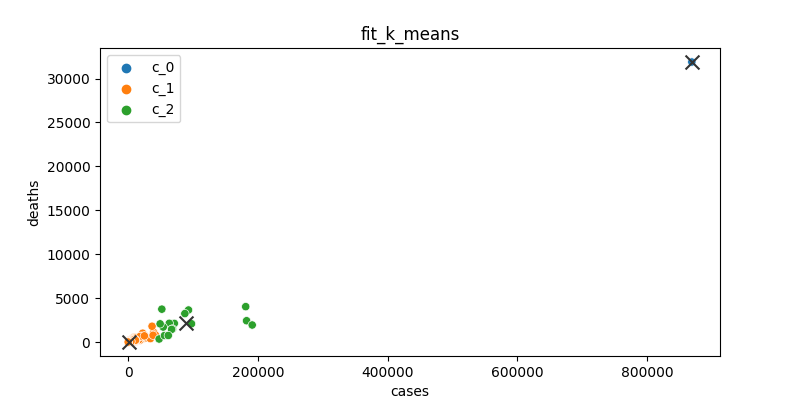

/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


In [209]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=df_kmeans, x='cases', y='deaths', hue=df_kmeans['cluster'])
sns.scatterplot(x=cent_xs, y=cent_ys, marker='x', s=100, color='.2', linewidth=1.5)
plt.title('fit_k_means')
plt.show()

In [192]:
from sklearn.cluster import KMeans

In [200]:
kmeans = KMeans(init='random', n_clusters=3, max_iter=300)
kmeans.fit(df[['cases','deaths']])
centroides_km = kmeans.cluster_centers_
n_iter_km = kmeans.n_iter_

In [202]:
centroides_km, n_iter_km

(array([[1.18691500e+03, 2.83966516e+01],
        [8.89453750e+04, 2.11487500e+03],
        [8.68824000e+05, 3.18870000e+04]]),
 13)

<IPython.core.display.Javascript object>


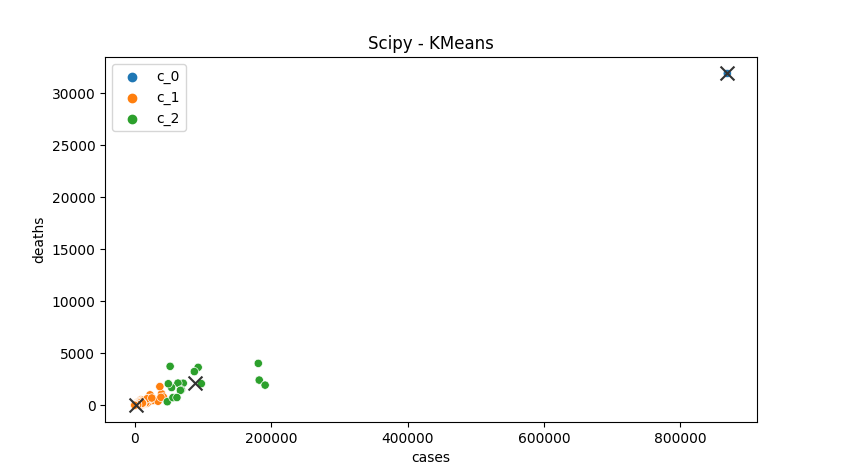

/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


In [211]:
sns.scatterplot(data=df_kmeans, x='cases', y='deaths', hue=df_kmeans['cluster'])
sns.scatterplot(x=centroides_km[:, 0], y=centroides_km[:, 1], marker='x', s=100, color='.2', linewidth=1.5)
plt.title('Scipy - KMeans')
plt.show()

<IPython.core.display.Javascript object>


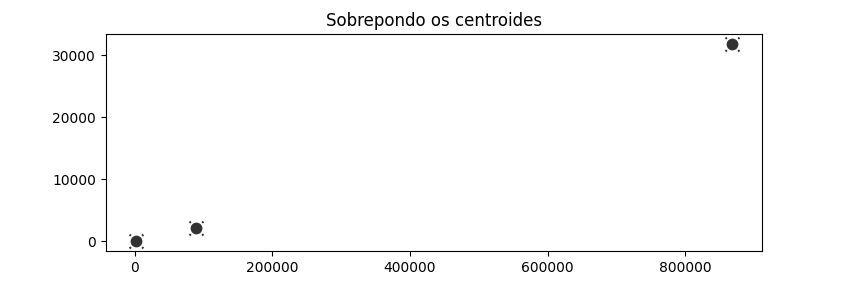

/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


In [212]:
sns.scatterplot(x=cent_xs, y=cent_ys, marker='x', s=100, color='.2', linewidth=1.5)
sns.scatterplot(x=centroides_km[:, 0], y=centroides_km[:, 1], marker='o', s=100, color='.2', linewidth=1.5)
plt.title('Sobrepondo os centroides')
plt.show()

- Scatter plot mostrando os pontos, centroids (marcador 'X'), em cores distintas;
- Para cada cluster, as distâsncias médias entre os pontos e o centróide final;
- O que cada cluster indica?
- Plotar gráfico com elbow point;
- Comparar com K-Means do `Scipy`

# PAM

# DBSCAN